## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Data Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Pest_Dataset_Split/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10210 files belonging to 36 classes.


### Valildation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Pest_Dataset_Split/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2950 files belonging to 36 classes.


## Building Model

In [4]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential 

In [5]:
model = Sequential()

### Building CNN Layers

In [6]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [8]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(Flatten()) 

In [13]:
model.add(Dense(units=1500,activation='relu'))

In [14]:
model.add(Dropout(0.4))

In [15]:
model.add(Dense(units=36,activation='softmax'))

### Compiling Model

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary();

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 36)                  │          54,036 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,839,760 (29.91 MB)

 Trainable params: 7,839,760 (29.91 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training_history = model.fit(x=training_set, validation_data=validation_set,epochs=25)

Epoch 1/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 194s 596ms/step - accuracy: 0.0593 - loss: 3.5513 - val_accuracy: 0.1329 - val_loss: 3.1912
Epoch 2/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 188s 588ms/step - accuracy: 0.1299 - loss: 3.1734 - val_accuracy: 0.1797 - val_loss: 2.9190
Epoch 3/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 189s 591ms/step - accuracy: 0.1862 - loss: 2.9181 - val_accuracy: 0.2485 - val_loss: 2.6817
Epoch 4/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 187s 586ms/step - accuracy: 0.2558 - loss: 2.6750 - val_accuracy: 0.3685 - val_loss: 2.2400
Epoch 5/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 187s 584ms/step - accuracy: 0.3594 - loss: 2.2659 - val_accuracy: 0.4346 - val_loss: 1.9866
Epoch 6/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 188s 589ms/step - accuracy: 0.4507 - loss: 1.9245 - val_accuracy: 0.5166 - val_loss: 1.7278
Epoch 7/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 189s 590ms/step - accuracy: 0.5329 - loss: 1.6068 - val_accuracy: 0.5254 - val_loss: 1.7446
Epoch 8/25
320/320 ━━━━━━━━━━━━━━━━━━━━ 188s 589ms/step - accuracy: 0.6178 -

## Saving Model

In [19]:
model.save("Pest_trained_model.keras")

In [20]:
training_history.history

{'accuracy': [0.07541625946760178,
  0.1545543521642685,
  0.22546522319316864,
  0.3037218451499939,
  0.394613116979599,
  0.48540645837783813,
  0.5705190896987915,
  0.6514201760292053,
  0.7223310470581055,
  0.7592556476593018,
  0.8138099908828735,
  0.8516160845756531,
  0.8426052927970886,
  0.8941234350204468,
  0.9007835388183594,
  0.9142017364501953,
  0.9254652261734009,
  0.9285014867782593,
  0.9386875629425049,
  0.937512218952179,
  0.9478942155838013,
  0.9418217539787292,
  0.9499510526657104,
  0.9402546286582947,
  0.9496572017669678],
 'loss': [3.4285411834716797,
  3.081026554107666,
  2.786142587661743,
  2.4764351844787598,
  2.135526180267334,
  1.7836729288101196,
  1.467484712600708,
  1.1865379810333252,
  0.9170644879341125,
  0.781781792640686,
  0.5899481177330017,
  0.4750031530857086,
  0.5029162764549255,
  0.33140629529953003,
  0.3002074360847473,
  0.2678866982460022,
  0.2320801317691803,
  0.21744270622730255,
  0.19509504735469818,
  0.19715248

In [21]:
#Recording history in json file 
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visualization

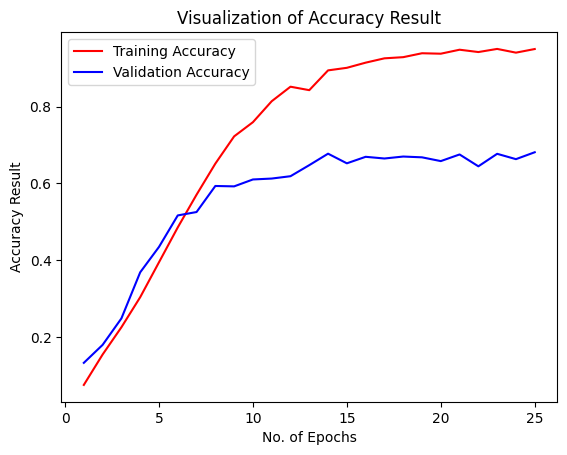

In [23]:
epochs = [i for i in range(1,26)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label="Training Accuracy")
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label="Validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [24]:
class_name = validation_set.class_names
class_name

['Beet Armyworm',
 'Black Hairy',
 'Cutworm',
 'Field Cricket',
 'Jute Aphid',
 'Jute Hairy',
 'Jute Red Mite',
 'Jute Semilooper',
 'Jute Stem Girdler',
 'Jute Stem Weevil',
 'Leaf Beetle',
 'Mealybug',
 'Pod Borer',
 'Scopula Emissaria',
 'Termite',
 'Termite odontotermes (Rambur)',
 'Yellow Mite',
 'ants',
 'aphids',
 'armyworm',
 'bees',
 'beetle',
 'bollworm',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'mites',
 'mosquito',
 'moth',
 'sawfly',
 'slug',
 'snail',
 'stem_borer',
 'wasp',
 'weevil']

In [25]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'Pest_Dataset_Split/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2950 files belonging to 36 classes.


In [26]:
y_pred = model.predict(test_set)
y_pred

93/93 ━━━━━━━━━━━━━━━━━━━━ 14s 144ms/step


array([[2.1288540e-04, 4.1102350e-04, 3.4450325e-03, ..., 1.6033389e-03,
        7.0375705e-04, 1.3618735e-05],
       [4.9744815e-02, 2.5539500e-01, 1.8227144e-01, ..., 1.6962879e-03,
        8.3510100e-04, 9.8350987e-02],
       [6.7675556e-03, 5.5446153e-06, 2.1033140e-05, ..., 5.4073957e-06,
        4.2116567e-06, 9.5503661e-04],
       ...,
       [4.0356605e-05, 3.2299387e-05, 4.0032126e-05, ..., 3.0751646e-05,
        5.1823004e-05, 4.7469378e-01],
       [4.4927714e-05, 6.7636784e-06, 1.5620752e-03, ..., 2.1635940e-04,
        1.0055282e-07, 1.6096641e-01],
       [1.1703475e-02, 7.7508972e-04, 2.5041185e-03, ..., 8.3382994e-02,
        1.6707805e-05, 4.5573330e-01]], dtype=float32)

In [27]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [28]:
predicted_categories

<tf.Tensor: shape=(2950,), dtype=int64, numpy=array([15,  1, 17, ..., 35,  9, 35], dtype=int64)>

In [29]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(2950, 36), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [30]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(2950,), dtype=int64, numpy=array([ 0,  0,  0, ..., 35, 35, 35], dtype=int64)>

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                               precision    recall  f1-score   support

                Beet Armyworm       0.27      0.15      0.19        40
                  Black Hairy       0.69      0.85      0.76        62
                      Cutworm       0.62      0.69      0.65        80
                Field Cricket       0.78      0.72      0.75        79
                   Jute Aphid       0.74      0.69      0.71       106
                   Jute Hairy       0.80      0.59      0.68        83
                Jute Red Mite       0.71      0.97      0.82        92
              Jute Semilooper       0.82      0.92      0.87        75
            Jute Stem Girdler       0.81      0.98      0.89        57
             Jute Stem Weevil       0.51      0.49      0.50       136
                  Leaf Beetle       0.69      0.89      0.78        63
                     Mealybug       0.75      0.82      0.79        94
                    Pod Borer       0.83      0.97      0.90        77
     

In [33]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[ 6,  2,  3, ...,  0,  0,  1],
       [ 0, 53,  0, ...,  0,  0,  0],
       [ 1,  1, 55, ...,  0,  2,  2],
       ...,
       [ 0,  3,  0, ..., 55,  0,  0],
       [ 0,  0,  0, ...,  0, 70,  3],
       [ 1,  1,  1, ...,  0,  0, 29]], dtype=int64)

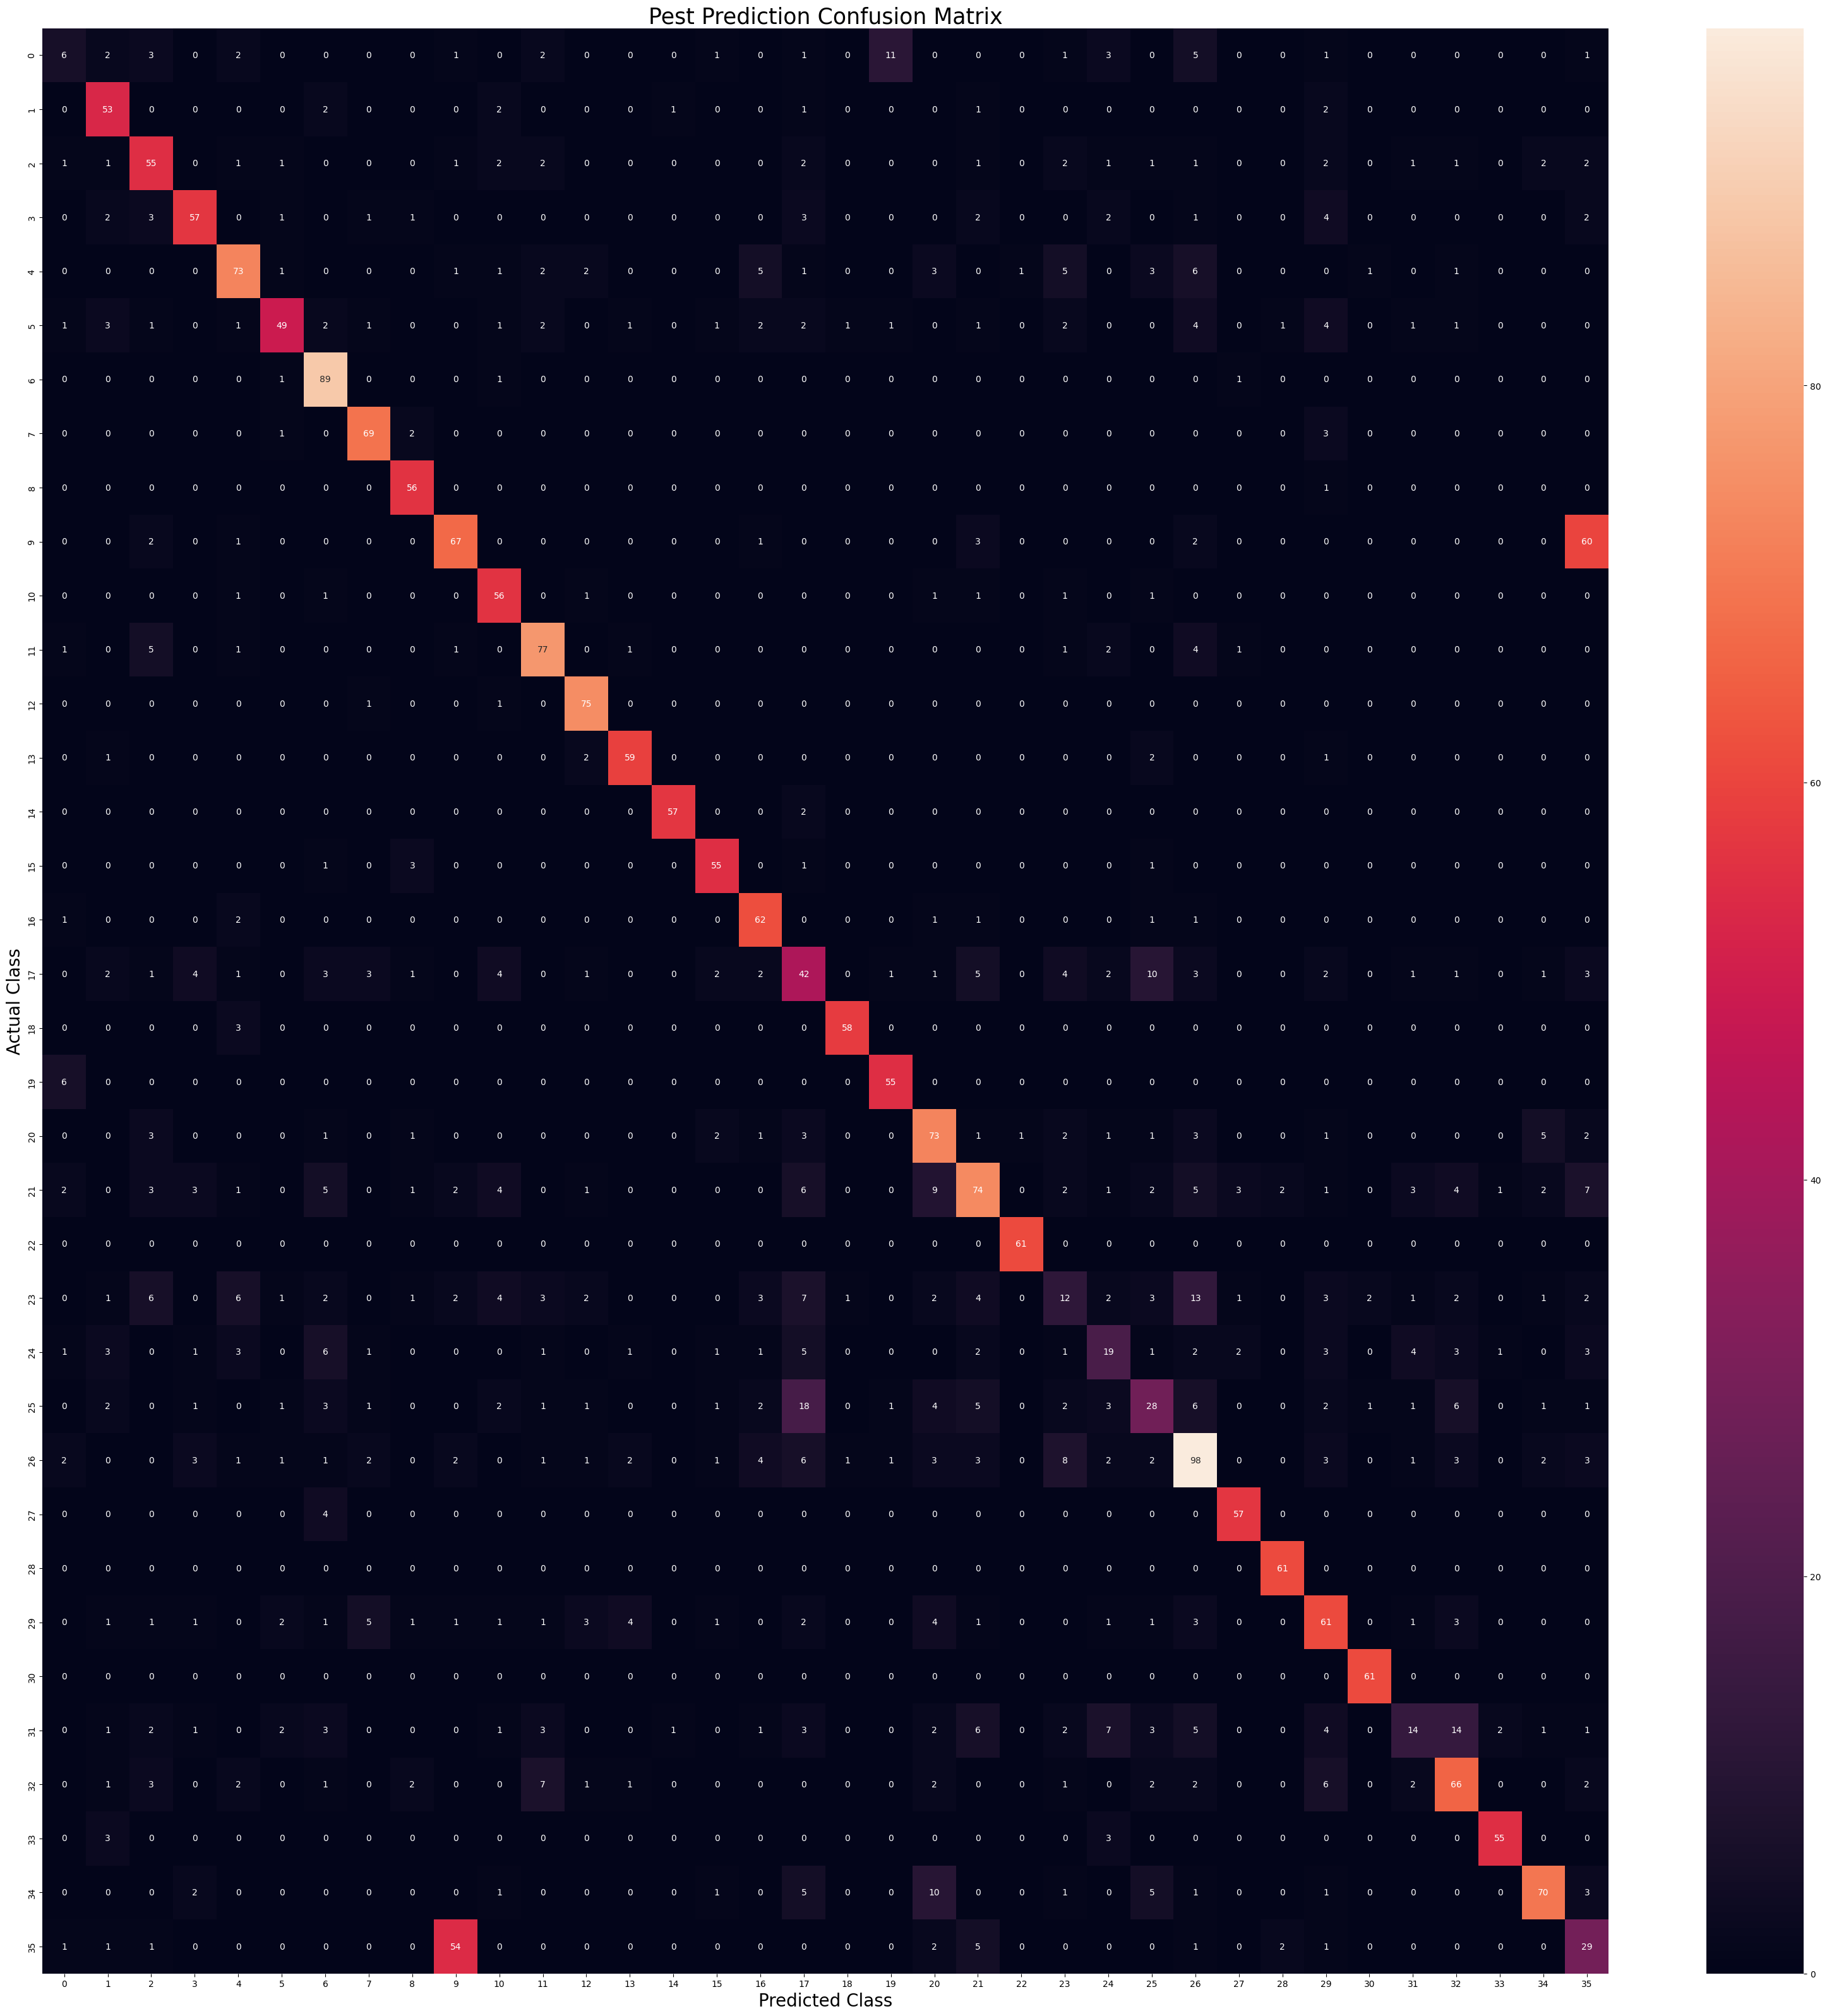

In [34]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Pest Prediction Confusion Matrix",fontsize=25)
plt.show()